## Lab 1

Task 1: Reading and Plotting Signal


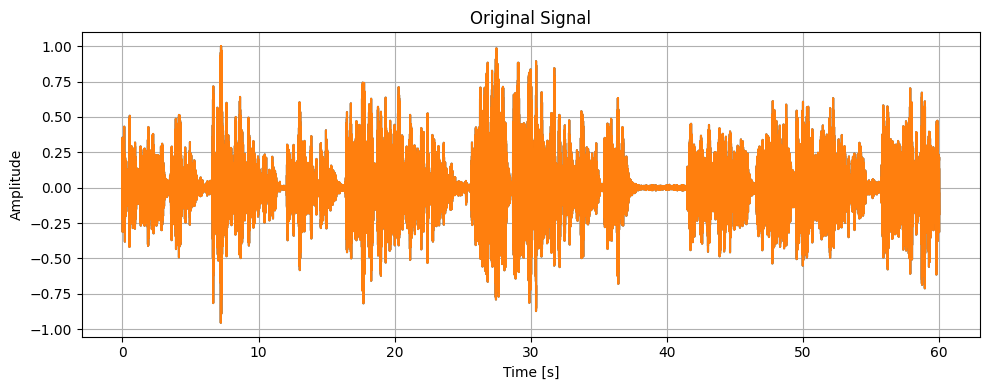


Task 2: Downsampling


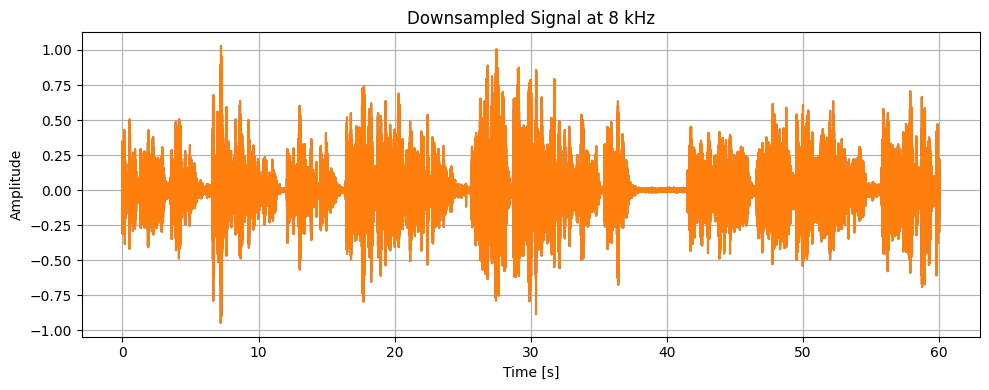


Task 3: Quantization


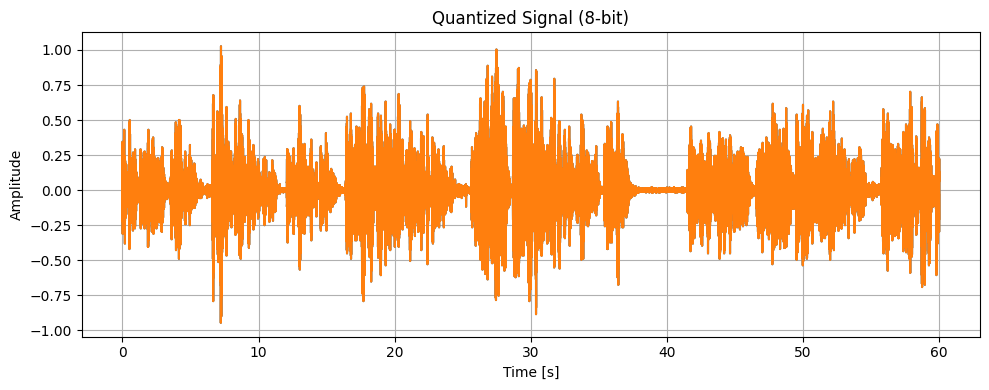

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample

# 0.2 Task 1: Signal Generation (Read & Plot)
print("Task 1: Reading and Plotting Signal")
fs, signal = wavfile.read(r"C:\Users\PMLS\Documents\Speech Processing\segment_4.wav")  # Replace with your file path

# Normalize if needed (to range -1 to 1)
signal = signal / np.max(np.abs(signal))

# Time axis for plotting
time = np.linspace(0, len(signal) / fs, len(signal))

# Plot original signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal)
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# 0.3 Task 2: Sampling
print("\nTask 2: Downsampling")
fs_new = 8000  # New sampling frequency
num_samples = int(len(signal) * fs_new / fs)
downsampled_signal = resample(signal, num_samples)

# Time axis for downsampled signal
time_new = np.linspace(0, len(signal) / fs, num_samples)

# Plot downsampled signal
plt.figure(figsize=(10, 4))
plt.plot(time_new, downsampled_signal)
plt.title("Downsampled Signal at 8 kHz")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# 0.4 Task 3: Quantization
print("\nTask 3: Quantization")
nbits = 8
L = 2 ** nbits  # 256 levels for 8-bit quantization
xmin, xmax = np.min(downsampled_signal), np.max(downsampled_signal)
delta = (xmax - xmin) / (L - 1)

# Uniform quantization
quantized_signal = np.round((downsampled_signal - xmin) / delta) * delta + xmin

# Plot quantized signal
plt.figure(figsize=(10, 4))
plt.plot(time_new, quantized_signal)
plt.title("Quantized Signal (8-bit)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# # 0.5 Task 4: Encoding to Binary
# print("\nTask 4: Encoding to Binary")

# # Step 1: Get quantized indices (0 to 255)
# quantized_indices = np.round((quantized_signal - xmin) / delta)
# quantized_indices = np.clip(quantized_indices, 0, L - 1).astype(int)

# # Step 2: Convert to binary strings
# binary_encoded = [format(i, f'0{nbits}b') for i in quantized_indices]

# # Display first few binary samples
# print("First 10 binary samples:", binary_encoded[:10])

# # 0.6 Task 5: Saving the Quantized Signal
# print("\nTask 5: Saving Quantized Signal to 'quantized_output.wav'")
# quantized_int = np.int16(quantized_signal / np.max(np.abs(quantized_signal)) * 32767)
# wavfile.write("quantized_output.wav", fs_new, quantized_int)

# # 0.7 Task 6: Observations
# print("\nTask 6: Observations")
# print("-" * 50)
# print("Original Sampling Rate:", fs)
# print("Downsampled Rate:", fs_new)
# print("Quantization Levels (8-bit):", L)
# print("Quantization Step Size (Δ):", delta)
# print("Binary Encoding Example (first 5):", binary_encoded[:5])
# print("-" * 50)


## Lab 2: Introduction to Discrete-Time Signal

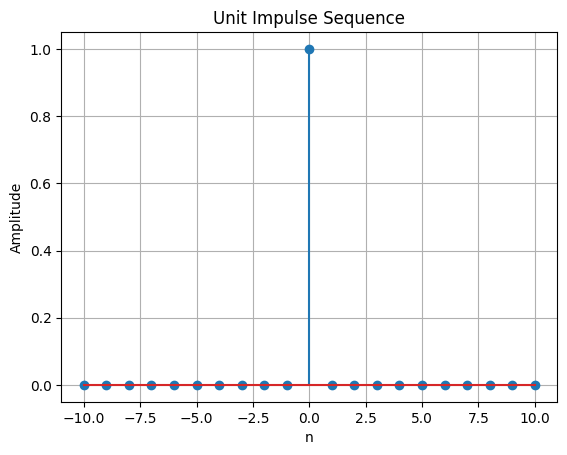

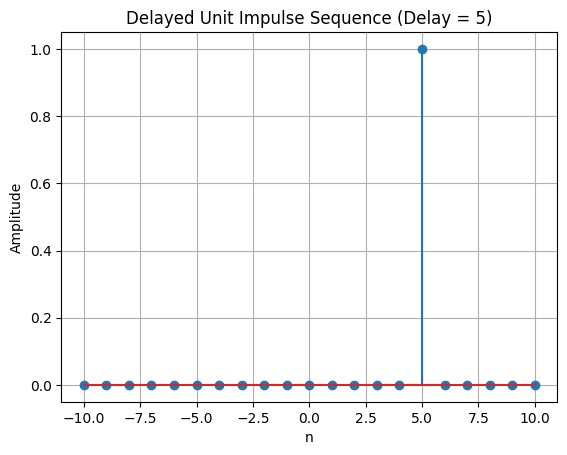

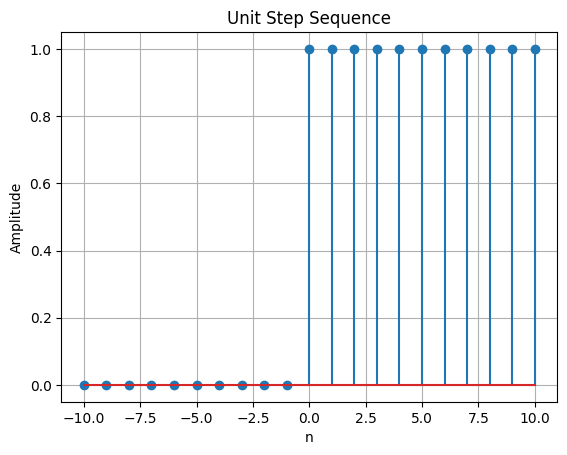

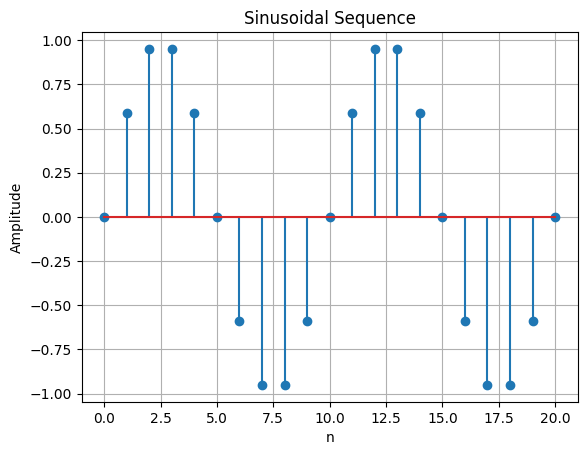

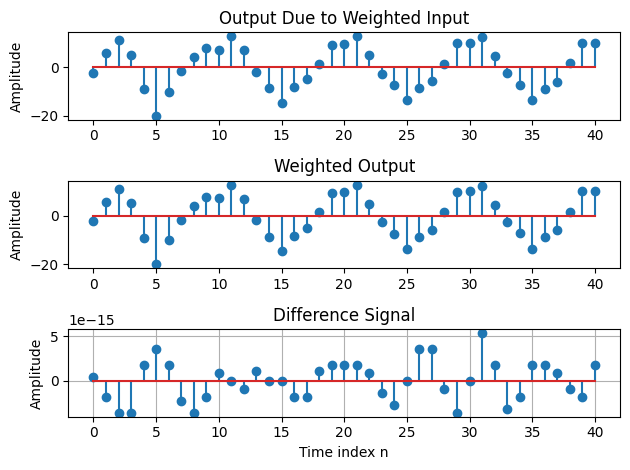

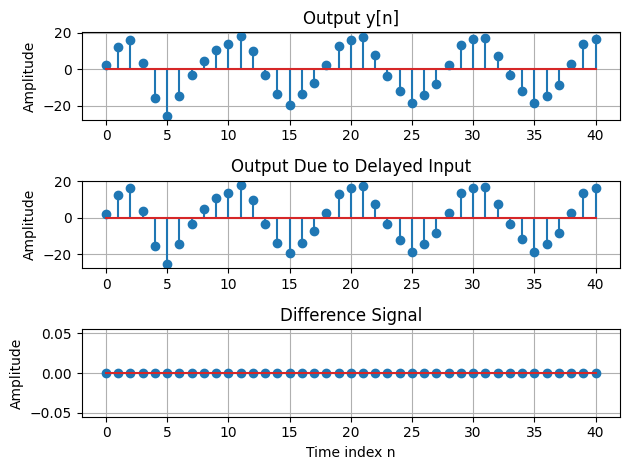

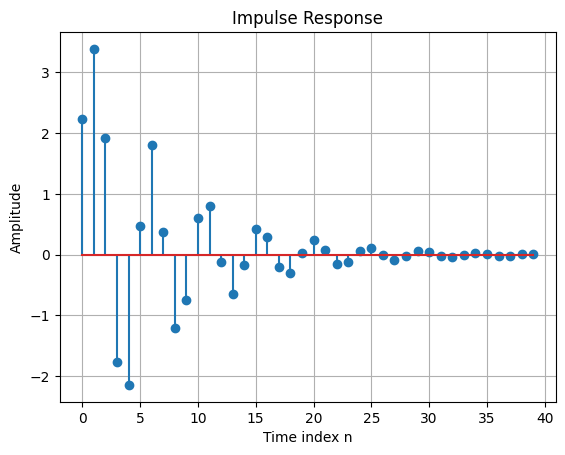

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, dlti, dimpulse

# -----------------------------
# Section 3: Generation of Sequences
# -----------------------------

def unit_impulse():
    n = np.arange(-10, 11)
    impulse = np.zeros(len(n))
    impulse[10] = 1  # Unit impulse at n = 0
    plt.stem(n, impulse)
    plt.title('Unit Impulse Sequence')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def delayed_unit_impulse(M):
    n = np.arange(-10, 11)
    delayed_impulse = (n == M).astype(int)
    plt.stem(n, delayed_impulse)
    plt.title(f'Delayed Unit Impulse Sequence (Delay = {M})')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def unit_step():
    n = np.arange(-10, 11)
    step = (n >= 0).astype(int)
    plt.stem(n, step)
    plt.title('Unit Step Sequence')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def sinusoidal():
    n = np.arange(0, 21)
    x = np.sin(2 * np.pi * 0.1 * n)
    plt.stem(n, x)
    plt.title('Sinusoidal Sequence')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# -----------------------------
# Section 5: Linearity Test
# -----------------------------

def linearity_test():
    n = np.arange(0, 41)
    a, b = 2, -3
    x1 = np.cos(2 * np.pi * 0.1 * n)
    x2 = np.cos(2 * np.pi * 0.4 * n)
    x = a * x1 + b * x2

    num = [2.2403, 2.4908, 2.2403]
    den = [1, -0.4, 0.75]
    zi = [0, 0]

    y1 = lfilter(num, den, x1)
    y2 = lfilter(num, den, x2)
    y = lfilter(num, den, x)
    yt = a * y1 + b * y2
    d = y - yt

    plt.subplot(3, 1, 1)
    plt.stem(n, y)
    plt.title('Output Due to Weighted Input')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.stem(n, yt)
    plt.title('Weighted Output')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.stem(n, d)
    plt.title('Difference Signal')
    plt.xlabel('Time index n')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.grid()
    plt.show()

# -----------------------------
# Section 6: Time Invariance Test
# -----------------------------

def time_invariance_test():
    n = np.arange(0, 41)
    D = 10
    a, b = 3.0, -2
    x = a * np.cos(2 * np.pi * 0.1 * n) + b * np.cos(2 * np.pi * 0.4 * n)
    xd = np.concatenate((np.zeros(D), x))  # Delayed input

    num = [2.2403, 2.4908, 2.2403]
    den = [1, -0.4, 0.75]

    y = lfilter(num, den, x)
    yd = lfilter(num, den, xd)
    yd_aligned = yd[D:D + len(n)]
    d = y - yd_aligned

    plt.subplot(3, 1, 1)
    plt.stem(n, y)
    plt.title('Output y[n]')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.stem(n, yd_aligned)
    plt.title('Output Due to Delayed Input')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.stem(n, d)
    plt.title('Difference Signal')
    plt.xlabel('Time index n')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.tight_layout()
    plt.show()

# -----------------------------
# Section 7: Impulse Response
# -----------------------------

def impulse_response():
    num = [2.2403, 2.4908, 2.2403]
    den = [1, -0.4, 0.75]
    N = 40
    system = dlti(num, den)
    t, y = dimpulse(system, n=N)

    plt.stem(t, np.squeeze(y))
    plt.title('Impulse Response')
    plt.xlabel('Time index n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# -----------------------------
# Main Execution
# -----------------------------

if __name__ == '__main__':
    unit_impulse()
    delayed_unit_impulse(M=5)
    unit_step()
    sinusoidal()
    linearity_test()
    time_invariance_test()
    impulse_response()


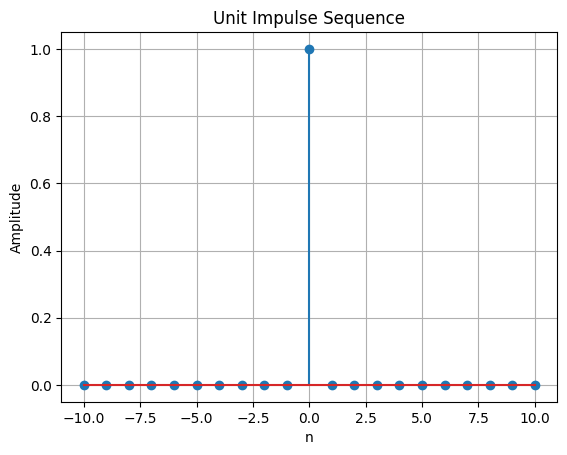

In [9]:

def unit_impulse():
    n = np.arange(-10, 11)
    impulse = np.zeros(len(n))
    impulse[10] = 1  # Unit impulse at n = 0
    plt.stem(n, impulse)
    plt.title('Unit Impulse Sequence')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
unit_impulse()

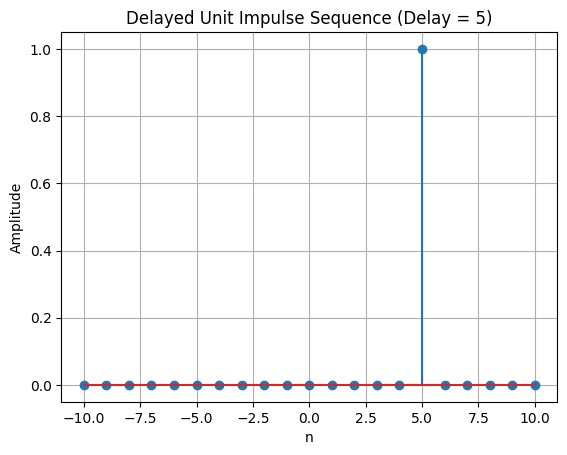

In [10]:
def delayed_unit_impulse(M):
    n = np.arange(-10, 11)
    delayed_impulse = (n == M).astype(int)
    plt.stem(n, delayed_impulse)
    plt.title(f'Delayed Unit Impulse Sequence (Delay = {M})')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
delayed_unit_impulse(M=5)


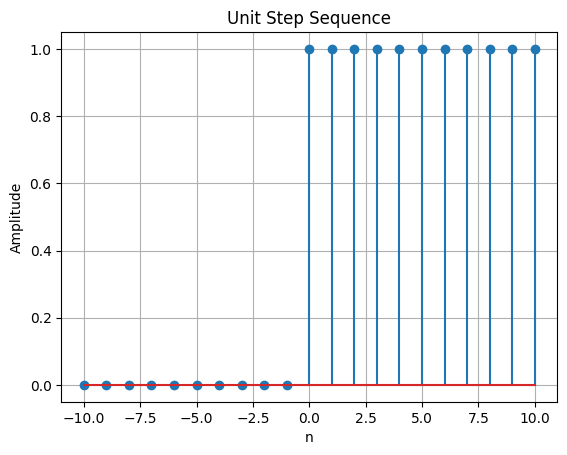

In [11]:
def unit_step():
    n = np.arange(-10, 11)
    step = (n >= 0).astype(int)
    plt.stem(n, step)
    plt.title('Unit Step Sequence')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
unit_step()


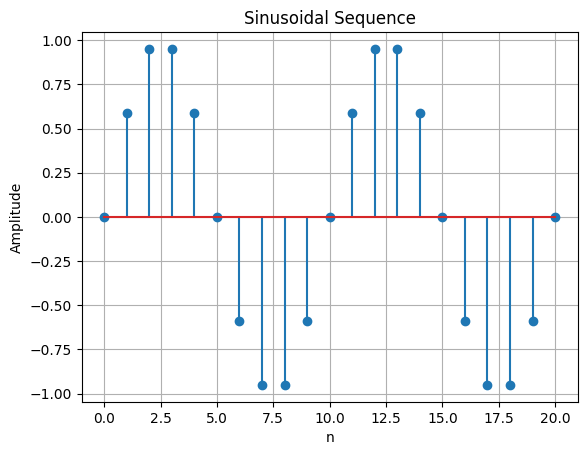

In [12]:
def sinusoidal():
    n = np.arange(0, 21)
    x = np.sin(2 * np.pi * 0.1 * n)
    plt.stem(n, x)
    plt.title('Sinusoidal Sequence')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
sinusoidal()    

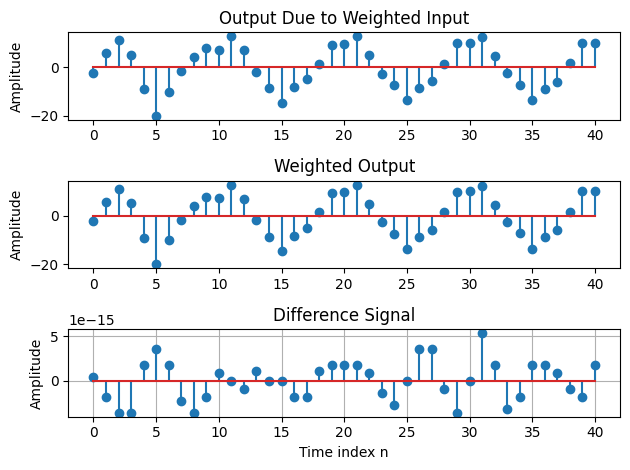

In [13]:
# Section 5: Linearity Test
# -----------------------------

def linearity_test():
    n = np.arange(0, 41)
    a, b = 2, -3
    x1 = np.cos(2 * np.pi * 0.1 * n)
    x2 = np.cos(2 * np.pi * 0.4 * n)
    x = a * x1 + b * x2

    num = [2.2403, 2.4908, 2.2403]
    den = [1, -0.4, 0.75]
    zi = [0, 0]

    y1 = lfilter(num, den, x1)
    y2 = lfilter(num, den, x2)
    y = lfilter(num, den, x)
    yt = a * y1 + b * y2
    d = y - yt
    plt.subplot(3, 1, 1)
    plt.stem(n, y)
    plt.title('Output Due to Weighted Input')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.stem(n, yt)
    plt.title('Weighted Output')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.stem(n, d)
    plt.title('Difference Signal')
    plt.xlabel('Time index n')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.grid()
    plt.show()
linearity_test()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


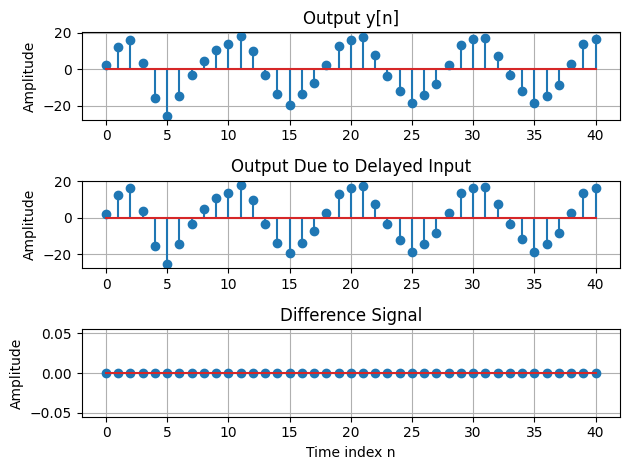

In [16]:
# Section 6: Time Invariance Test
# -----------------------------

def time_invariance_test():
    n = np.arange(0, 41)
    D = 10
    a, b = 3.0, -2
    x = a * np.cos(2 * np.pi * 0.1 * n) + b * np.cos(2 * np.pi * 0.4 * n)
    xd = np.concatenate((np.zeros(D), x))  # Delayed input
    num = [2.2403, 2.4908, 2.2403]
    den = [1, -0.4, 0.75]

    y = lfilter(num, den, x)
    yd = lfilter(num, den, xd)
    yd_aligned = yd[D:D + len(n)]
    d = y - yd_aligned

    plt.subplot(3, 1, 1)
    plt.stem(n, y)
    plt.title('Output y[n]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.subplot(3, 1, 2)
    plt.stem(n, yd_aligned)
    plt.title('Output Due to Delayed Input')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.stem(n, d)
    plt.title('Difference Signal')
    plt.xlabel('Time index n')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.tight_layout()
    plt.show()
time_invariance_test()

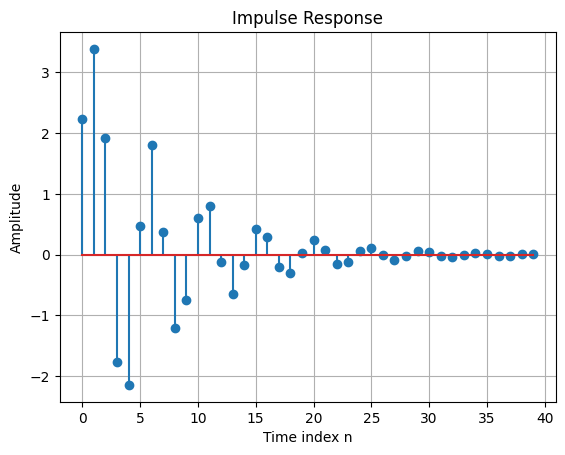

In [17]:
def impulse_response():
    num = [2.2403, 2.4908, 2.2403]
    den = [1, -0.4, 0.75]
    N = 40
    system = dlti(num, den)
    t, y = dimpulse(system, n=N)

    plt.stem(t, np.squeeze(y))
    plt.title('Impulse Response')
    plt.xlabel('Time index n')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
impulse_response()

## Lab task of lab 2

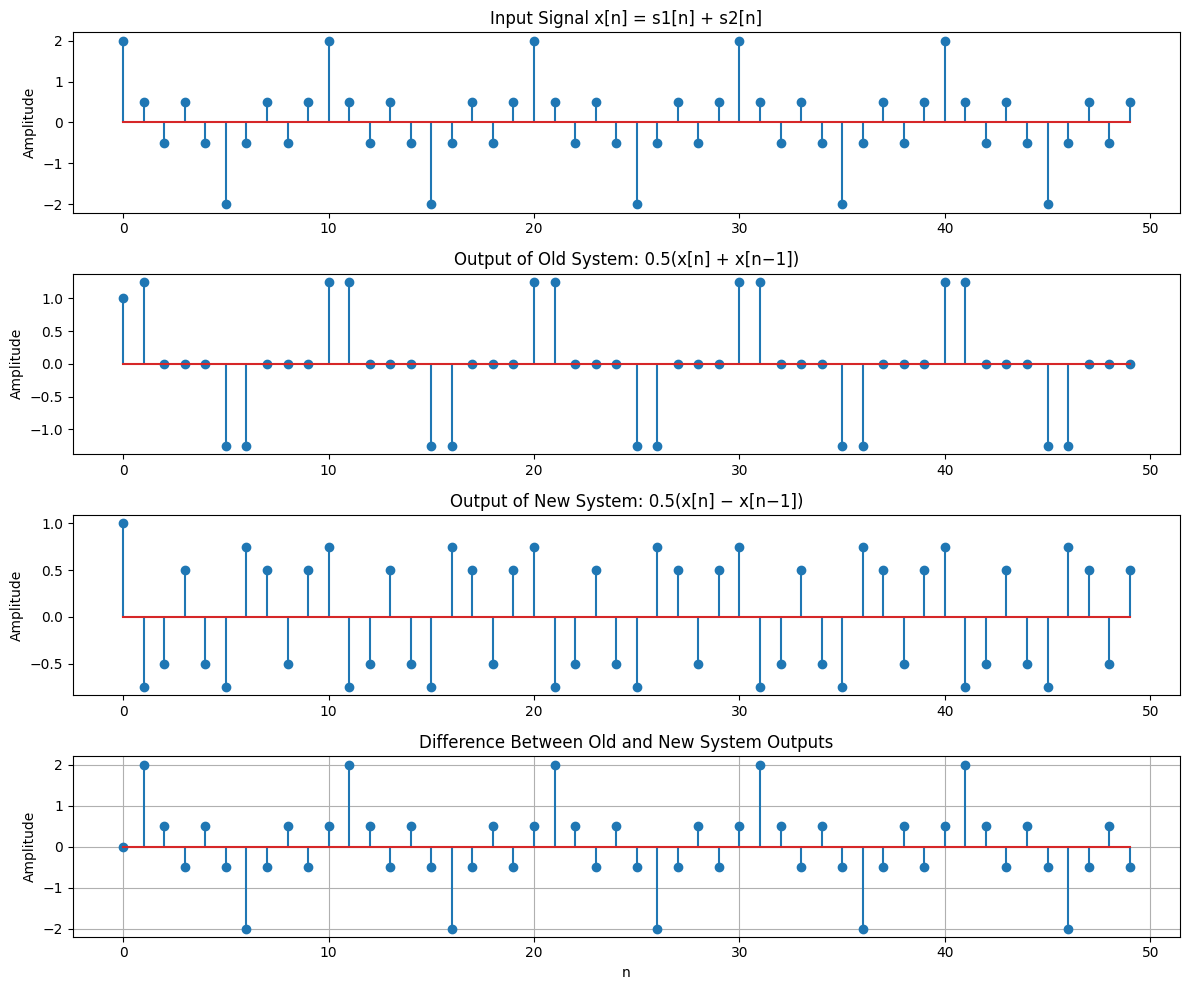

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define time index
n = np.arange(0, 50)

# Define s1[n] and s2[n]
s1 = np.cos(0.2 * np.pi * n)  # low-frequency
s2 = np.cos(0.6 * np.pi * n)  # high-frequency

# Input signal x[n] = s1[n] + s2[n]
x = s1 + s2

# Define the old system: y[n] = 0.5(x[n] + x[n-1])
# Define the new system: y[n] = 0.5(x[n] - x[n-1])
# Use np.convolve with appropriate system coefficients

# Impulse response of old system
h_old = np.array([0.5, 0.5])  # moving average
y_old = np.convolve(x, h_old, mode='same')

# Impulse response of new system
h_new = np.array([0.5, -0.5])  # difference
y_new = np.convolve(x, h_new, mode='same')

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.stem(n, x)
plt.title('Input Signal x[n] = s1[n] + s2[n]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.stem(n, y_old)
plt.title('Output of Old System: 0.5(x[n] + x[n−1])')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.stem(n, y_new)
plt.title('Output of New System: 0.5(x[n] − x[n−1])')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.stem(n, y_old - y_new )
plt.title('Difference Between Old and New System Outputs')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.grid(True)
plt.show()


## LAB 3: Z TRANSFORM 

In [36]:
import sympy
print(sympy.__version__)

1.13.1


## lab 4:IDFT AND DFT

=== Convolution ===
Convolution Result: [ 4. 11. 20. 30. 20. 11.  4.]


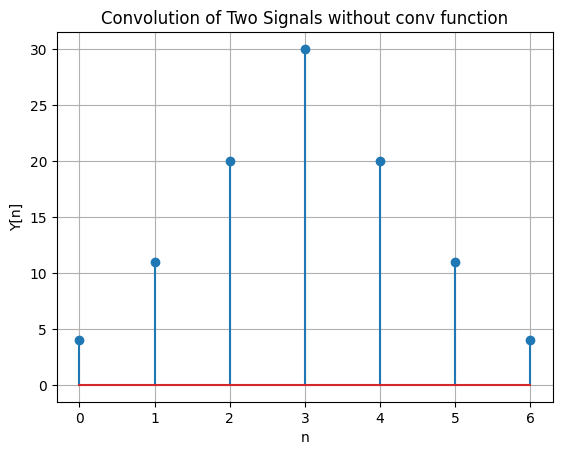


=== DFT ===
Length of sequence: 4
DFT Result: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


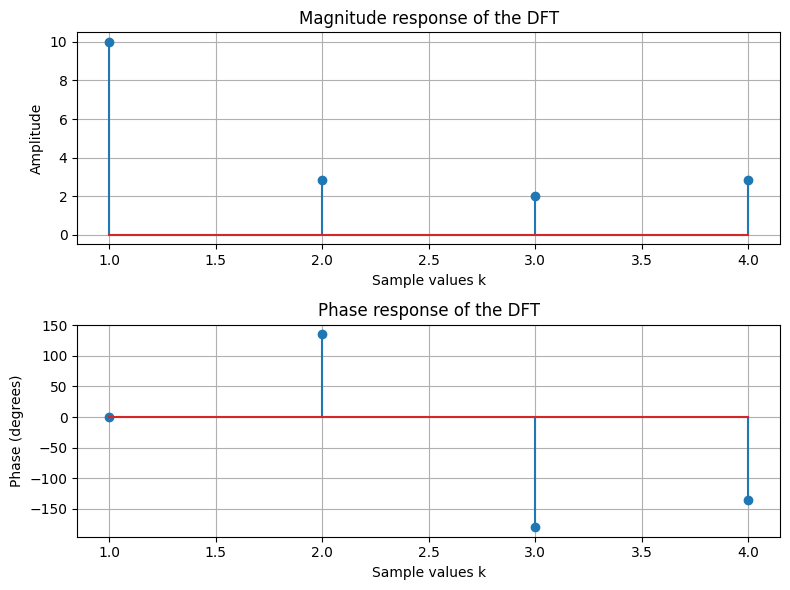


=== IDFT ===
Length of sequence: 4
IDFT Result: [1.-5.55111512e-16j 2.-2.77555756e-16j 3.-1.11022302e-16j
 4.+2.77555756e-16j]


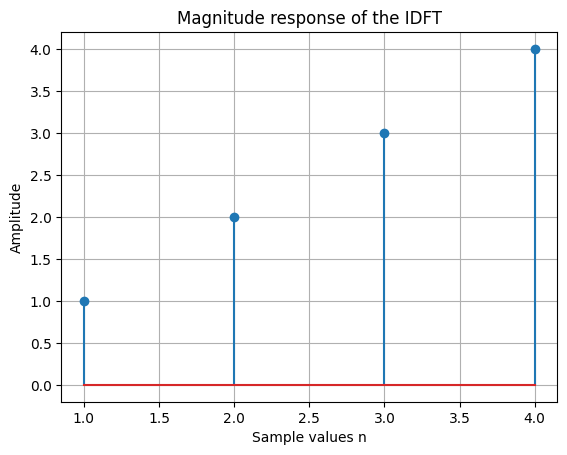


=== FFT ===
FFT Result: [ 1.+0.j  0.-1.j -1.+0.j  0.+1.j  1.+0.j  0.-1.j -1.+0.j  0.+1.j]


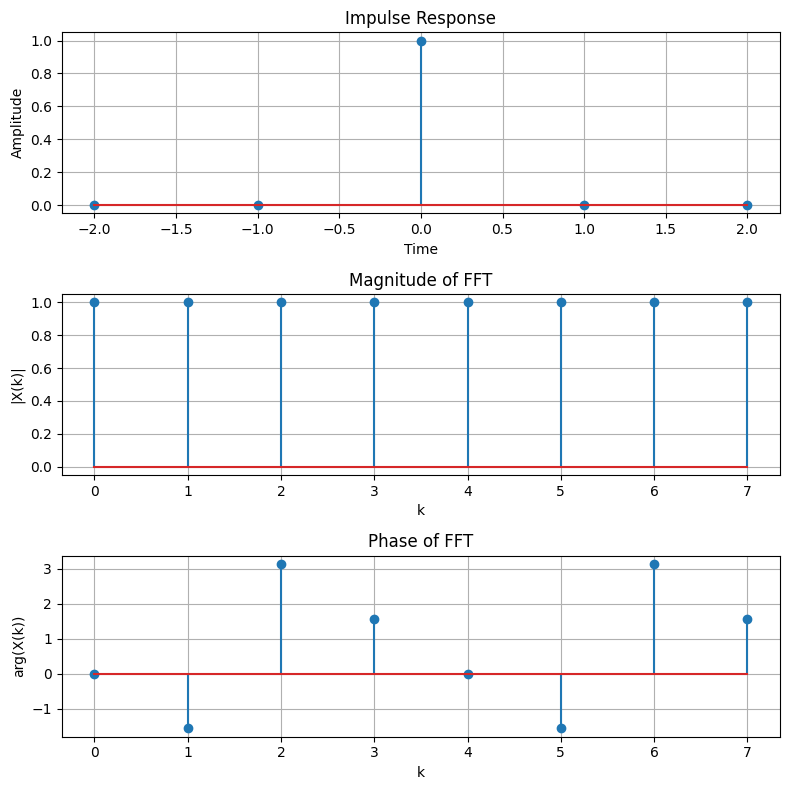


=== FFT of Step, Ramp, Exponential ===
FFT of Step Sequence: [8.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


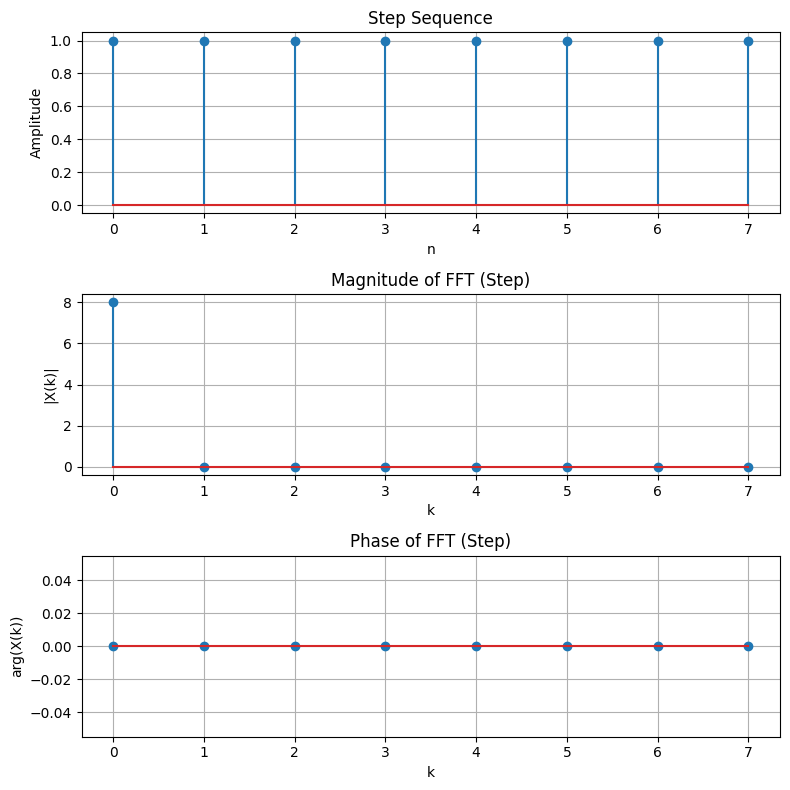

FFT of Ramp Sequence: [28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


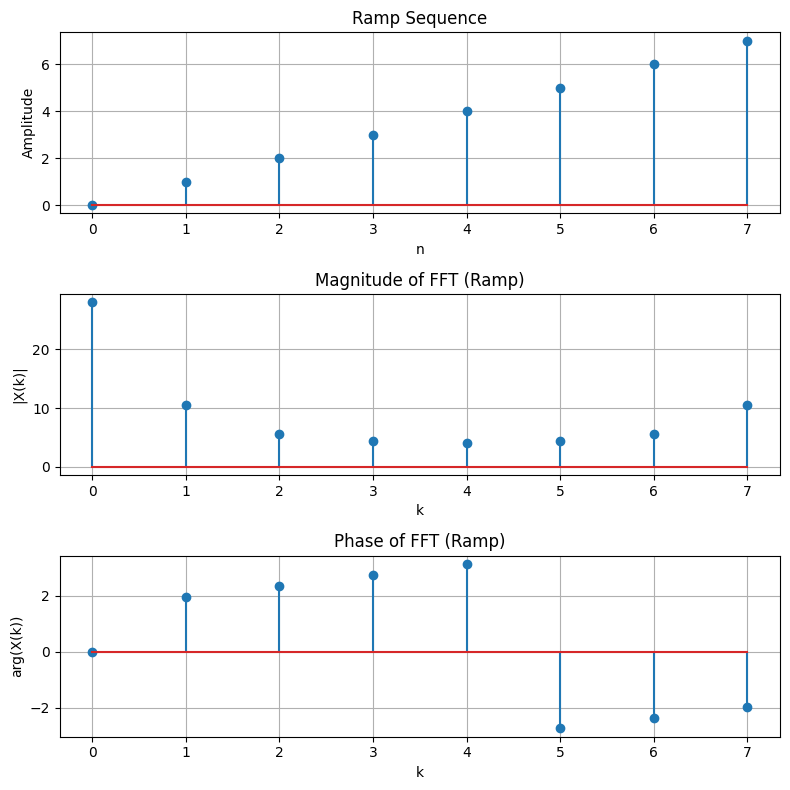

FFT of Exponential Sequence: [ 82.62123111 +0.j           6.40956971+45.0628851j
 -14.41476265+23.7659258j  -19.18768191+10.32837492j
 -20.23548141 +0.j         -19.18768191-10.32837492j
 -14.41476265-23.7659258j    6.40956971-45.0628851j ]


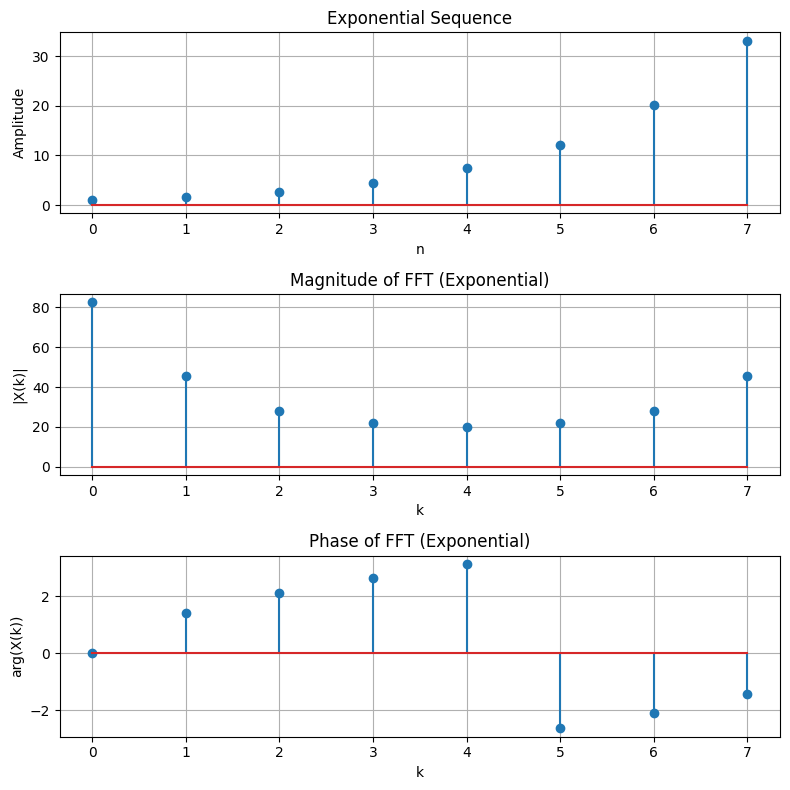

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Section 3.1: Convolution without conv function
def convolution_manual():
    # Input sequences (using lab task sequences)
    x = np.array([1, 2, 3, 4])  # x = [1, 2, 3, 4]
    h = np.array([4, 3, 2, 1])  # h = [4, 3, 2, 1]
    
    m = len(x)
    n = len(h)
    
    # Zero-pad sequences
    X = np.concatenate([x, np.zeros(n)])
    H = np.concatenate([h, np.zeros(m)])
    
    # Compute convolution
    Y = np.zeros(n + m - 1)
    for i in range(n + m - 1):
        for j in range(m):
            if i - j >= 0 and i - j < len(H):
                Y[i] += X[j] * H[i - j]
    
    # Plot
    plt.figure()
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Convolution of Two Signals without conv function')
    plt.grid(True)
    print("Convolution Result:", Y)
    plt.show()

# Section 4.1: Discrete Fourier Transform (DFT)
def dft_manual():
    # Input sequence (using lab task sequence)
    a = np.array([1, 2, 3, 4])  # x = [1, 2, 3, 4]
    N = len(a)
    print("Length of sequence:", N)
    
    # Compute DFT
    y = np.zeros(N, dtype=complex)
    for k in range(N):
        for i in range(N):
            y[k] += a[i] * np.exp(-2j * np.pi / N * i * k)
    
    # Plot magnitude and phase
    k = np.arange(1, N + 1)  # 1-based indexing for plotting
    plt.figure(figsize=(8, 6))
    
    plt.subplot(211)
    plt.stem(k, np.abs(y))
    plt.xlabel('Sample values k')
    plt.ylabel('Amplitude')
    plt.title('Magnitude response of the DFT')
    plt.grid(True)
    
    plt.subplot(212)
    plt.stem(k, np.angle(y) * 180 / np.pi)
    plt.xlabel('Sample values k')
    plt.ylabel('Phase (degrees)')
    plt.title('Phase response of the DFT')
    plt.grid(True)
    
    plt.tight_layout()
    print("DFT Result:", y)
    plt.show()

# Section 5.1: Inverse Discrete Fourier Transform (IDFT)
def idft_manual():
    # Input sequence (using DFT of [1, 2, 3, 4] or user-defined)
    a = np.array([1, 2, 3, 4])  # x = [1, 2, 3, 4]
    N = len(a)
    print("Length of sequence:", N)
    
    # Compute DFT first (to use as input for IDFT)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for i in range(N):
            X[k] += a[i] * np.exp(-2j * np.pi / N * i * k)
    
    # Compute IDFT
    y = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            y[n] += X[k] * np.exp(2j * np.pi / N * k * n)
        y[n] /= N
    
    # Plot
    n = np.arange(1, N + 1)
    plt.figure()
    plt.stem(n, np.abs(y))  # Plot magnitude (real part for IDFT)
    plt.xlabel('Sample values n')
    plt.ylabel('Amplitude')
    plt.title('Magnitude response of the IDFT')
    plt.grid(True)
    print("IDFT Result:", y)
    plt.show()

# Section 6.1: Fast Fourier Transform (FFT)
def fft_analysis():
    # Impulse response (same as MATLAB code)
    t = np.arange(-2, 3)
    y = np.array([0, 0, 1, 0, 0])  # Impulse at t=0
    
    # Plot impulse response
    plt.figure(figsize=(8, 8))
    plt.subplot(311)
    plt.stem(t, y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Impulse Response')
    plt.grid(True)
    
    # Compute FFT
    N = 8  # Length of FFT (user-defined, default to 8 for example)
    xk = np.fft.fft(y, N)
    magxk = np.abs(xk)
    angxk = np.angle(xk)
    k = np.arange(N)
    
    # Plot magnitude
    plt.subplot(312)
    plt.stem(k, magxk)
    plt.xlabel('k')
    plt.ylabel('|X(k)|')
    plt.title('Magnitude of FFT')
    plt.grid(True)
    
    # Plot phase
    plt.subplot(313)
    plt.stem(k, angxk)
    plt.xlabel('k')
    plt.ylabel('arg(X(k))')
    plt.title('Phase of FFT')
    plt.grid(True)
    
    plt.tight_layout()
    print("FFT Result:", xk)
    plt.show()

# Lab Task: FFT for Step, Ramp, and Exponential Sequences
def fft_sequences():
    # Define sequences
    n = np.arange(8)  # Length 8 for consistency
    step = np.ones(8)  # Step sequence: [1, 1, 1, 1, 1, 1, 1, 1]
    ramp = n  # Ramp sequence: [0, 1, 2, 3, 4, 5, 6, 7]
    exponential = np.exp(0.5 * n)  # Exponential sequence: e^(0.5n)
    
    sequences = [(step, 'Step'), (ramp, 'Ramp'), (exponential, 'Exponential')]
    
    for seq, name in sequences:
        # Compute FFT
        N = len(seq)
        X = np.fft.fft(seq, N)
        mag = np.abs(X)
        phase = np.angle(X)
        k = np.arange(N)
        
        # Plot
        plt.figure(figsize=(8, 8))
        
        # Input signal
        plt.subplot(311)
        plt.stem(n, seq)
        plt.xlabel('n')
        plt.ylabel('Amplitude')
        plt.title(f'{name} Sequence')
        plt.grid(True)
        
        # Magnitude
        plt.subplot(312)
        plt.stem(k, mag)
        plt.xlabel('k')
        plt.ylabel('|X(k)|')
        plt.title(f'Magnitude of FFT ({name})')
        plt.grid(True)
        
        # Phase
        plt.subplot(313)
        plt.stem(k, phase)
        plt.xlabel('k')
        plt.ylabel('arg(X(k))')
        plt.title(f'Phase of FFT ({name})')
        plt.grid(True)
        
        plt.tight_layout()
        print(f"FFT of {name} Sequence:", X)
        plt.show()

# Run all sections
if __name__ == "__main__":
    print("=== Convolution ===")
    convolution_manual()
    
    print("\n=== DFT ===")
    dft_manual()
    
    print("\n=== IDFT ===")
    idft_manual()
    
    print("\n=== FFT ===")
    fft_analysis()
    
    print("\n=== FFT of Step, Ramp, Exponential ===")
    fft_sequences()

Convolution Result: [ 4. 11. 20. 30. 20. 11.  4.]


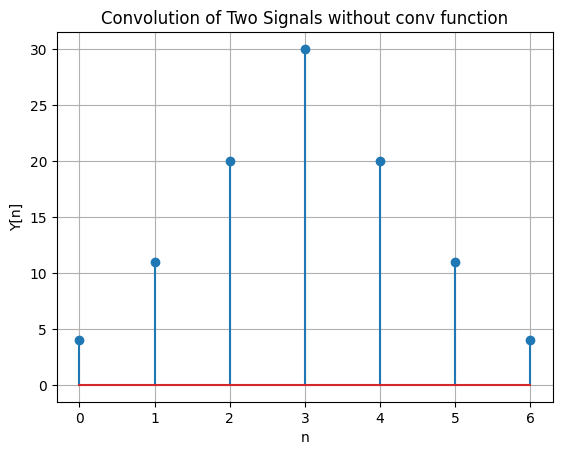

In [39]:
# Section 3.1: Convolution without conv function
def convolution_manual():
    # Input sequences (using lab task sequences)
    x = np.array([1, 2, 3, 4])  # x = [1, 2, 3, 4]
    h = np.array([4, 3, 2, 1])  # h = [4, 3, 2, 1]
    
    m = len(x)
    n = len(h)
    
    # Zero-pad sequences
    X = np.concatenate([x, np.zeros(n)])
    H = np.concatenate([h, np.zeros(m)])
    
    # Compute convolution
    Y = np.zeros(n + m - 1)
    for i in range(n + m - 1):
        for j in range(m):
            if i - j >= 0 and i - j < len(H):
                Y[i] += X[j] * H[i - j]
    
    # Plot
    plt.figure()
    plt.stem(range(len(Y)), Y)
    plt.xlabel('n')
    plt.ylabel('Y[n]')
    plt.title('Convolution of Two Signals without conv function')
    plt.grid(True)
    print("Convolution Result:", Y)
    plt.show()
convolution_manual()

Length of sequence: 4
DFT Result: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


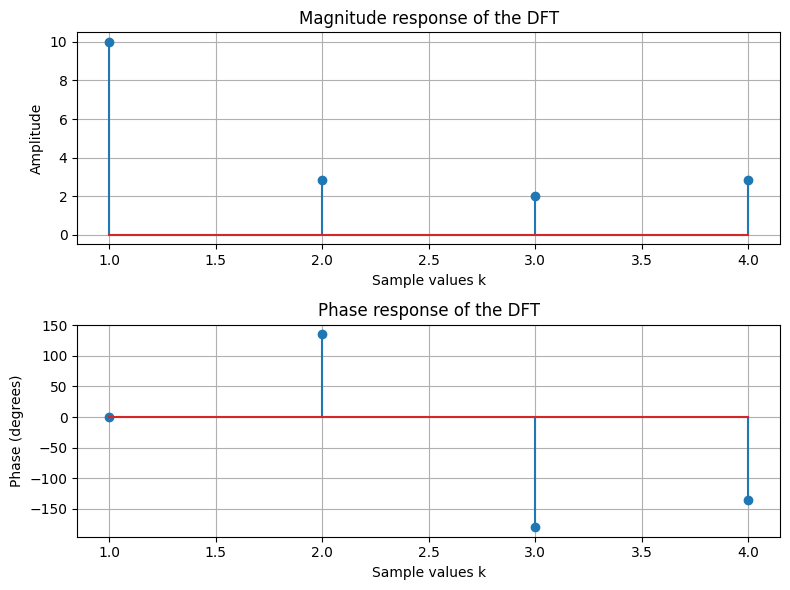

In [41]:
# Section 4.1: Discrete Fourier Transform (DFT)
def dft_manual():
    # Input sequence (using lab task sequence)
    a = np.array([1, 2, 3, 4])  # x = [1, 2, 3, 4]
    N = len(a)
    print("Length of sequence:", N)
    
    # Compute DFT
    y = np.zeros(N, dtype=complex)
    for k in range(N):
        for i in range(N):
            y[k] += a[i] * np.exp(-2j * np.pi / N * i * k)
    
    # Plot magnitude and phase
    k = np.arange(1, N + 1)  # 1-based indexing for plotting
    plt.figure(figsize=(8, 6))
    plt.subplot(211)
    plt.stem(k, np.abs(y))
    plt.xlabel('Sample values k')
    plt.ylabel('Amplitude')
    plt.title('Magnitude response of the DFT')
    plt.grid(True)
    
    plt.subplot(212)
    plt.stem(k, np.angle(y) * 180 / np.pi)
    plt.xlabel('Sample values k')
    plt.ylabel('Phase (degrees)')
    plt.title('Phase response of the DFT')
    plt.grid(True)
    
    plt.tight_layout()
    print("DFT Result:", y)
    plt.show()
dft_manual()

Length of sequence: 4
IDFT Result: [1.-5.55111512e-16j 2.-2.77555756e-16j 3.-1.11022302e-16j
 4.+2.77555756e-16j]


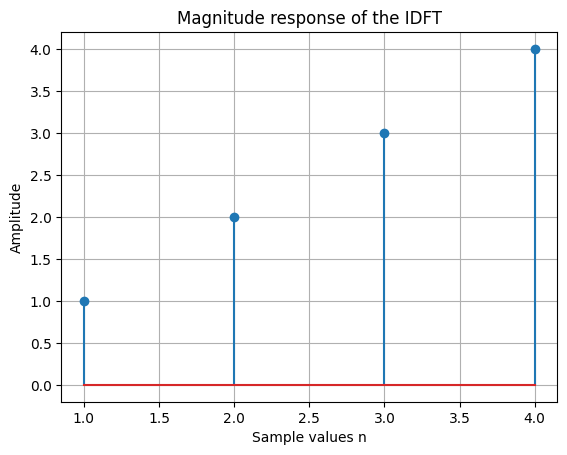

In [43]:
# Section 5.1: Inverse Discrete Fourier Transform (IDFT)
def idft_manual():
    # Input sequence (using DFT of [1, 2, 3, 4] or user-defined)
    a = np.array([1, 2, 3, 4])  # x = [1, 2, 3, 4]
    N = len(a)
    print("Length of sequence:", N)
    
    # Compute DFT first (to use as input for IDFT)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for i in range(N):
            X[k] += a[i] * np.exp(-2j * np.pi / N * i * k)
    
    # Compute IDFT
    y = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            y[n] += X[k] * np.exp(2j * np.pi / N * k * n)
        y[n] /= N
            # Plot
    n = np.arange(1, N + 1)
    plt.figure()
    plt.stem(n, np.abs(y))  # Plot magnitude (real part for IDFT)
    plt.xlabel('Sample values n')
    plt.ylabel('Amplitude')
    plt.title('Magnitude response of the IDFT')
    plt.grid(True)
    print("IDFT Result:", y)
    plt.show()
idft_manual()

## CEPSTRUM ANALYSIS 

Input Sequence: [1 2 3 4]
DFT (Manual): [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
Magnitude of DFT: [10.          2.82842712  2.          2.82842712]
Log-Magnitude (ln(|X(k)| + ε)): [2.30258509 1.03972077 0.69314718 1.03972077]
Cepstrum (Manual): [1.26879345 0.40235948 0.22907268 0.40235948]


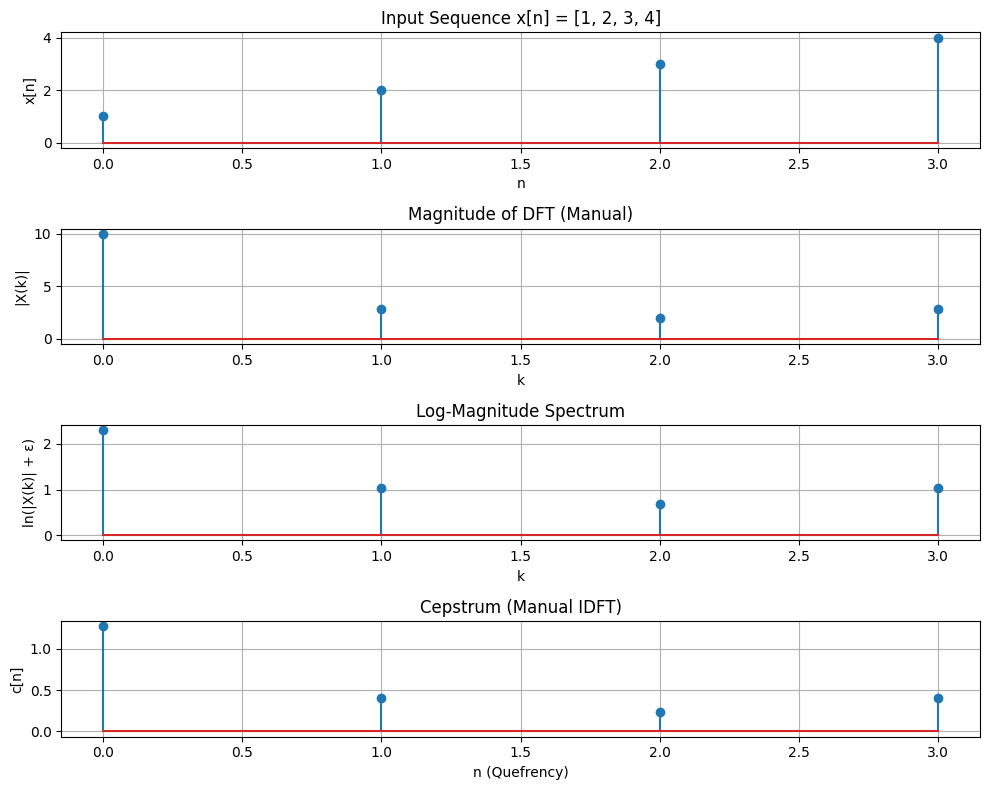

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def manual_dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * n * k / N)
    return X

def manual_idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
        x[n] /= N
    return x

def cepstrum_analysis_manual():
    # Input sequence
    x = np.array([1, 2, 3, 4])
    N = len(x)
    n = np.arange(N)
    
    # Step 1: Compute manual DFT
    X = manual_dft(x)
    mag_X = np.abs(X)
    
    # Step 2: Natural log of magnitude (add small epsilon to avoid log(0))
    epsilon = 1e-10
    log_mag_X = np.log(mag_X + epsilon)
    
    # Step 3: Compute manual IDFT of log-magnitude to get cepstrum
    cepstrum = manual_idft(log_mag_X).real  # Take real part for numerical stability
    
    # Plotting
    plt.figure(figsize=(10, 8))
    
    # Plot input sequence
    plt.subplot(411)
    plt.stem(n, x)
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title('Input Sequence x[n] = [1, 2, 3, 4]')
    plt.grid(True)
    
    # Plot DFT magnitude
    k = np.arange(N)
    plt.subplot(412)
    plt.stem(k, mag_X)
    plt.xlabel('k')
    plt.ylabel('|X(k)|')
    plt.title('Magnitude of DFT (Manual)')
    plt.grid(True)
    
    # Plot log-magnitude
    plt.subplot(413)
    plt.stem(k, log_mag_X)
    plt.xlabel('k')
    plt.ylabel('ln(|X(k)| + ε)')
    plt.title('Log-Magnitude Spectrum')
    plt.grid(True)
    
    # Plot cepstrum
    plt.subplot(414)
    plt.stem(n, cepstrum)
    plt.xlabel('n (Quefrency)')
    plt.ylabel('c[n]')
    plt.title('Cepstrum (Manual IDFT)')
    plt.grid(True)
    
    plt.tight_layout()
    
    # Print results
    print("Input Sequence:", x)
    print("DFT (Manual):", X)
    print("Magnitude of DFT:", mag_X)
    print("Log-Magnitude (ln(|X(k)| + ε)):", log_mag_X)
    print("Cepstrum (Manual):", cepstrum)
    
    plt.show()

if __name__ == "__main__":
    cepstrum_analysis_manual()